In [1]:
%load_ext lab_black

In [2]:
import sys
import os

# Add the parent folder to path to be able to easily access other agents
sys.path.append(os.path.abspath(os.path.join("..")))
# print("\n".join(sys.path))

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from luxai_s2.env import LuxAI_S2
import matplotlib.pyplot as plt
import numpy as np

# Import agents to work with
from agent_v4.agent import Agent

In [6]:
def animate(imgs, _return=True):
    """
    Combines images to make a video that can be rendered in notebook
    Returns:
        video generated from images
    """
    # using cv2 to generate videos as moviepy doesn't work on kaggle notebooks
    import cv2
    import os
    import string
    import random

    video_name = (
        "".join(random.choice(string.ascii_letters) for i in range(18)) + ".webm"
    )
    height, width, layers = imgs[0].shape
    fourcc = cv2.VideoWriter_fourcc(*"VP90")
    video = cv2.VideoWriter(video_name, fourcc, 10, (width, height))

    for img in imgs:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        video.write(img)
    video.release()
    if _return:
        from IPython.display import Video

        return Video(video_name)


def interact(env, agents, steps):
    """
    Plays the agents against each other for the first <steps> of the game
    Returns:
       a video of game"""
    # reset our env
    obs = env.reset(seed=41)
    np.random.seed(0)
    imgs = []
    step = 0
    # Note that as the environment has two phases, we also keep track a value called
    # `real_env_steps` in the environment state. The first phase ends once `real_env_steps` is 0 and used below

    # iterate until phase 1 ends
    while env.state.real_env_steps < 0:
        if step >= steps:
            break
        actions = {}
        for player in env.agents:
            o = obs[player]
            a = agents[player].early_setup(step, o)
            actions[player] = a
        step += 1
        obs, rewards, dones, infos = env.step(actions)
        imgs += [env.render("rgb_array", width=640, height=640)]
    done = False
    while not done:
        if step >= steps:
            break
        actions = {}
        for player in env.agents:
            o = obs[player]
            a = agents[player].act(step, o)
            actions[player] = a
        step += 1
        obs, rewards, dones, infos = env.step(actions)
        imgs += [env.render("rgb_array", width=640, height=640)]
        done = dones["player_0"] and dones["player_1"]
    return animate(imgs)

# Make Video of Agents playing

In [7]:
env = LuxAI_S2()  # create the environment object
agents = {player: Agent(player, env.state.env_cfg) for player in env.possible_agents}
interact(env, agents, 25)

# Working with env one step at a time

In [89]:
env = LuxAI_S2()
agents = {player: Agent(player, env.state.env_cfg) for player in env.possible_agents}
agent = agents["player_0"]

## Early Setup Phase

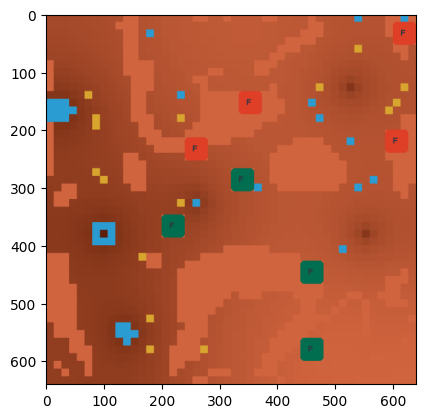

In [90]:
# Run the early_setup phase
obs = env.reset(seed=42)  # resets an environment with a seed
step = 0
while env.state.real_env_steps < 0:
    actions = {}
    for player in env.agents:
        o = obs[player]
        acts = agents[player].early_setup(step, o)
        actions[player] = acts
    step += 1
    obs, rewards, dones, infos = env.step(actions)
plt.imshow(env.render("rgb_array", width=640, height=640))

## Run one step at a time

In [91]:
all_actions = {}

Carrying out step 13
{'unit_8': [array([0, 1, 0, 0, 2, 1])]}
{}
{}
{}


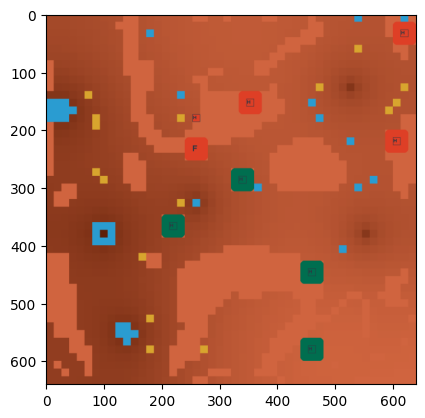

In [97]:
print(f"Carrying out step {step}")
actions = {player: agent.act(step, obs[player]) for player, agent in agents.items()}
all_actions[step] = actions  # Just for debugging
step += 1
obs, rewards, dones, infos = env.step(actions)
plt.imshow(env.render("rgb_array", width=640, height=640))

In [74]:
a = env.get_state().units["player_0"]["unit_8"].action_queue

In [79]:
for act in a:
    print(act.state_dict())

[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 3 0 0 0 1]
[0 3 0 0 0 1]
[0 4 0 0 0 1]
[0 4 0 0 0 1]
